In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('train_v9rqX0R.csv')

In [3]:
test_df = pd.read_csv('test_AbJTz2l.csv')

In [4]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
train_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
test_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [10]:
train_df.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [11]:
test_df.apply(lambda x: len(x.unique()))

Item_Identifier              1543
Item_Weight                   411
Item_Fat_Content                5
Item_Visibility              5277
Item_Type                      16
Item_MRP                     4402
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
dtype: int64

In [12]:
# check null values

In [13]:
train_df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [14]:
test_df.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [15]:
#check categorical attributes

In [16]:
cat_col = []
for x in train_df.dtypes.index:
    if train_df.dtypes[x] == 'object':
        cat_col.append(x)
        
cat_col       

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [17]:
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier') 

cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [18]:
for col in cat_col:
    print(col)
    print(train_df[col].value_counts())
    print()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int6

In [19]:
# fill the missing value

In [20]:
train_df['Item_Weight'] = train_df['Item_Weight'].fillna(train_df['Item_Weight'].mean())

In [21]:
train_df['Item_Weight'].isna().sum()

0

In [22]:
test_df['Item_Weight'] = test_df['Item_Weight'].fillna(test_df['Item_Weight'].mean())

In [23]:
test_df['Item_Weight'].isna().sum()

0

In [24]:
# replace missing value in outlet size with mode

In [25]:
train_df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [26]:
test_df['Outlet_Size'].isna().sum()

1606

In [27]:
train_df['Outlet_Size'].isna().sum()

2410

In [28]:
train_df['Outlet_Size'] = train_df['Outlet_Size'].fillna(train_df['Outlet_Size'].mode()[0])

In [29]:
train_df['Outlet_Size'].isna().sum()

0

In [30]:
test_df['Outlet_Size'] = test_df['Outlet_Size'].fillna(test_df['Outlet_Size'].mode()[0])

In [31]:
test_df['Outlet_Size'].isna().sum()

0

In [32]:
# combine item fat content

In [33]:
train_df['Item_Fat_Content'] = train_df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular', 'low fat':'Low Fat'})
train_df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [34]:
test_df['Item_Fat_Content'] = test_df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular', 'low fat':'Low Fat'})
test_df['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [35]:
# ceate new attribute

In [36]:
train_df['New_Item_Type'] = train_df.Item_Identifier.apply(lambda x:x[0:2])

train_df['New_Item_Type'].value_counts()

FD    6125
NC    1599
DR     799
Name: New_Item_Type, dtype: int64

In [37]:
train_df['New_Item_Type'] = train_df['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable','DR':'Drinks'})
train_df['New_Item_Type'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_Type, dtype: int64

In [38]:
test_df['New_Item_Type'] = test_df.Item_Identifier.apply(lambda x:x[0:2])

test_df['New_Item_Type'].value_counts()

FD    4076
NC    1087
DR     518
Name: New_Item_Type, dtype: int64

In [39]:
test_df['New_Item_Type'] = test_df['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable','DR':'Drinks'})
test_df['New_Item_Type'].value_counts()

Food              4076
Non-Consumable    1087
Drinks             518
Name: New_Item_Type, dtype: int64

In [40]:
# create small values for establishment year

In [41]:
train_df['Outlet_Establishment_Year'].max()

2009

In [42]:
train_df['Outlet_Years'] = 2015 - train_df['Outlet_Establishment_Year']

In [43]:
train_df['Outlet_Years']

0       16
1        6
2       16
3       17
4       28
        ..
8518    28
8519    13
8520    11
8521     6
8522    18
Name: Outlet_Years, Length: 8523, dtype: int64

In [44]:
test_df['Outlet_Years'] = 2015 - test_df['Outlet_Establishment_Year']

In [45]:
test_df['Outlet_Years']


0       16
1        8
2       17
3        8
4       30
        ..
5676    18
5677     6
5678    13
5679     8
5680    13
Name: Outlet_Years, Length: 5681, dtype: int64

# Exploratory Data Analysis

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

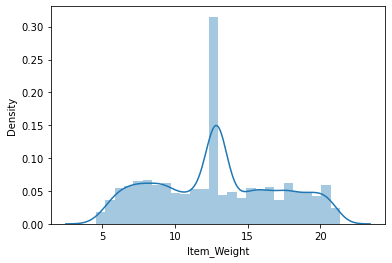

In [46]:
sns.distplot(train_df['Item_Weight'])

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

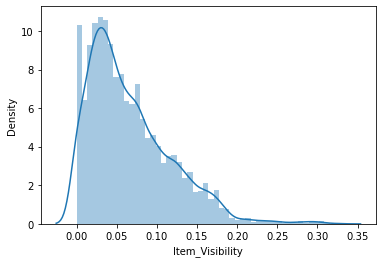

In [47]:
sns.distplot(train_df['Item_Visibility'])

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

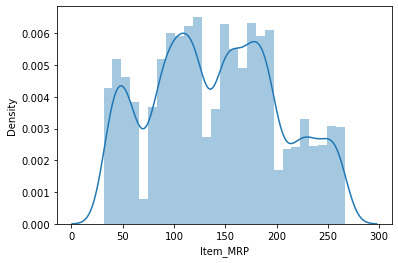

In [48]:
sns.distplot(train_df['Item_MRP'])

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

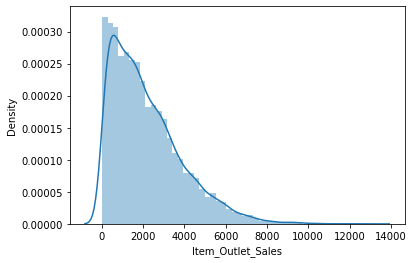

In [49]:
sns.distplot(train_df['Item_Outlet_Sales'])

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

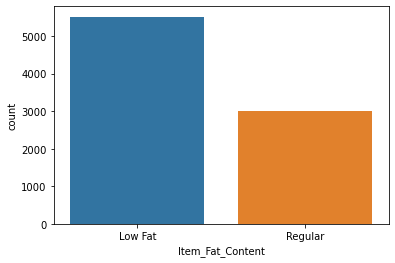

In [50]:
sns.countplot(train_df['Item_Fat_Content'])

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Dairy'),
 Text(1, 0, 'Soft Drinks'),
 Text(2, 0, 'Meat'),
 Text(3, 0, 'Fruits and Vegetables'),
 Text(4, 0, 'Household'),
 Text(5, 0, 'Baking Goods'),
 Text(6, 0, 'Snack Foods'),
 Text(7, 0, 'Frozen Foods'),
 Text(8, 0, 'Breakfast'),
 Text(9, 0, 'Health and Hygiene'),
 Text(10, 0, 'Hard Drinks'),
 Text(11, 0, 'Canned'),
 Text(12, 0, 'Breads'),
 Text(13, 0, 'Starchy Foods'),
 Text(14, 0, 'Others'),
 Text(15, 0, 'Seafood')]

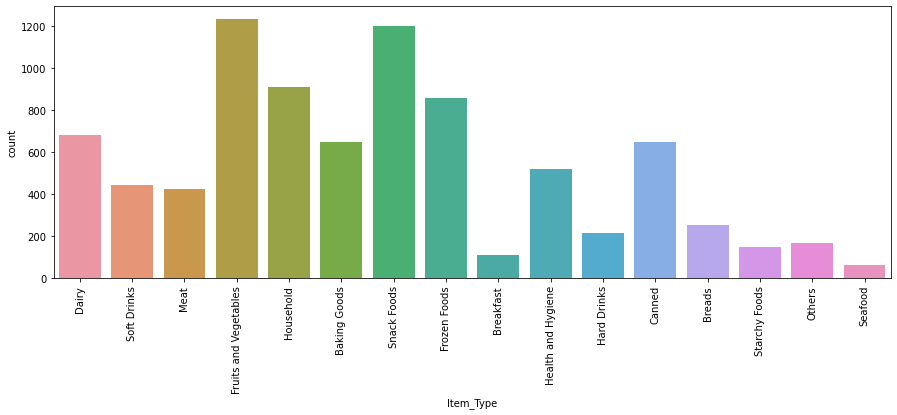

In [51]:
plt.figure(figsize=(15,5))
l= list(train_df['Item_Type'].unique())
chart = sns.countplot(train_df['Item_Type'])
chart.set_xticklabels(labels=l, rotation=90)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

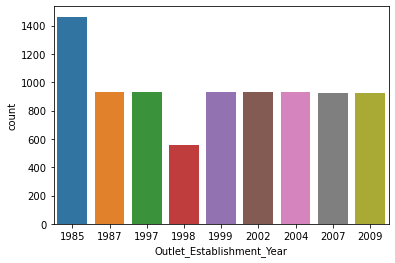

In [52]:
sns.countplot(train_df['Outlet_Establishment_Year'])

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

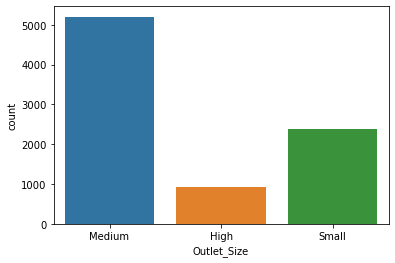

In [53]:
sns.countplot(train_df['Outlet_Size'])

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

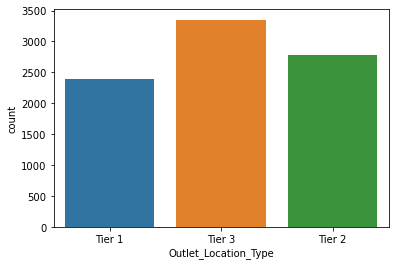

In [54]:
sns.countplot(train_df['Outlet_Location_Type'])

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

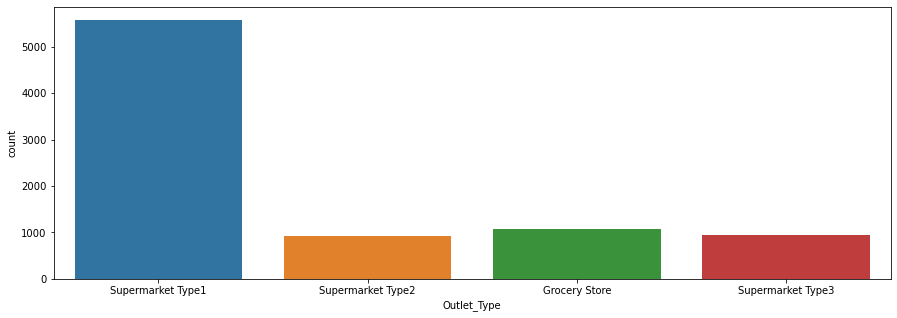

In [55]:
plt.figure(figsize=(15,5))
sns.countplot(train_df['Outlet_Type'])

In [56]:
# correlation Matrix

<AxesSubplot:>

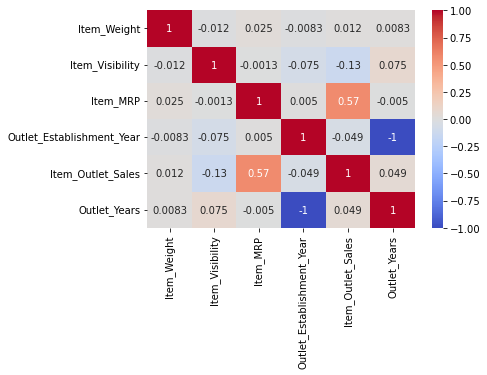

In [57]:
corr = train_df.corr()
sns.heatmap(corr, annot = True, cmap= 'coolwarm' )

In [58]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,16
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,6
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,16
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,Food,17
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,28


In [59]:
# label encoding and one hot encoding

In [60]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [61]:
train_df['Outlet'] = le.fit_transform(train_df['Outlet_Identifier'])
cat_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type']
for col in cat_col:
    train_df[col] = le.fit_transform(train_df[col])

In [62]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years,Outlet
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380,1,16,9
1,DRC01,5.92,1,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228,0,6,3
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700,1,16,9
3,FDX07,19.20,1,0.000000,6,182.0950,OUT010,1998,1,2,0,732.3800,1,17,0
4,NCD19,8.93,0,0.000000,9,53.8614,OUT013,1987,0,2,1,994.7052,2,28,1


In [63]:
train_df = pd.get_dummies(train_df, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'])
train_df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Outlet,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,FDA15,9.30,0.016047,4,249.8092,OUT049,1999,3735.1380,16,9,...,1,0,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,14,48.2692,OUT018,2009,443.4228,6,3,...,0,0,1,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,10,141.6180,OUT049,1999,2097.2700,16,9,...,1,0,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.000000,6,182.0950,OUT010,1998,732.3800,17,0,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.93,0.000000,9,53.8614,OUT013,1987,994.7052,28,1,...,0,0,1,0,1,0,0,0,0,1


In [64]:
test_df['Outlet'] = le.fit_transform(test_df['Outlet_Identifier'])
cat_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type']
for col in cat_col:
    test_df[col] = le.fit_transform(test_df[col])

In [65]:
test_df = pd.get_dummies(test_df, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'])
test_df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Years,Outlet,Item_Fat_Content_0,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,FDW58,20.750000,0.007565,13,107.8622,OUT049,1999,16,9,1,...,1,0,0,0,1,0,0,0,1,0
1,FDW14,8.300000,0.038428,4,87.3198,OUT017,2007,8,2,0,...,0,1,0,0,1,0,0,0,1,0
2,NCN55,14.600000,0.099575,11,241.7538,OUT010,1998,17,0,1,...,0,0,1,1,0,0,0,0,0,1
3,FDQ58,7.315000,0.015388,13,155.0340,OUT017,2007,8,2,1,...,0,1,0,0,1,0,0,0,1,0
4,FDY38,12.695633,0.118599,4,234.2300,OUT027,1985,30,5,0,...,0,0,1,0,0,0,1,0,1,0


In [66]:
test_df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Years,Outlet,Item_Fat_Content_0,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,FDW58,20.750000,0.007565,13,107.8622,OUT049,1999,16,9,1,...,1,0,0,0,1,0,0,0,1,0
1,FDW14,8.300000,0.038428,4,87.3198,OUT017,2007,8,2,0,...,0,1,0,0,1,0,0,0,1,0
2,NCN55,14.600000,0.099575,11,241.7538,OUT010,1998,17,0,1,...,0,0,1,1,0,0,0,0,0,1
3,FDQ58,7.315000,0.015388,13,155.0340,OUT017,2007,8,2,1,...,0,1,0,0,1,0,0,0,1,0
4,FDY38,12.695633,0.118599,4,234.2300,OUT027,1985,30,5,0,...,0,0,1,0,0,0,1,0,1,0


In [67]:
train_df.drop(['Item_Identifier','Outlet_Identifier'], axis = 1, inplace = True)
test_df.drop(['Item_Identifier','Outlet_Identifier'], axis =1, inplace = True)

In [68]:
train_df.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Outlet,Item_Fat_Content_0,Item_Fat_Content_1,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,9.30,0.016047,4,249.8092,1999,3735.1380,16,9,1,0,...,1,0,0,0,1,0,0,0,1,0
1,5.92,0.019278,14,48.2692,2009,443.4228,6,3,0,1,...,0,0,1,0,0,1,0,1,0,0
2,17.50,0.016760,10,141.6180,1999,2097.2700,16,9,1,0,...,1,0,0,0,1,0,0,0,1,0
3,19.20,0.000000,6,182.0950,1998,732.3800,17,0,0,1,...,0,0,1,1,0,0,0,0,1,0
4,8.93,0.000000,9,53.8614,1987,994.7052,28,1,1,0,...,0,0,1,0,1,0,0,0,0,1


In [69]:
x=train_df.drop('Item_Outlet_Sales',axis=1)
y=train_df['Item_Outlet_Sales']

In [70]:
# splitting data

In [71]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state=42)

In [72]:
# standardization

In [73]:
x.describe()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Years,Outlet,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Size_0,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,...,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,7.226681,140.992782,1997.831867,17.168133,4.722281,0.647307,0.352693,0.109351,...,0.280183,0.326763,0.393054,0.127068,0.654347,0.108882,0.109703,0.093746,0.718644,0.187610
std,4.226124,0.051598,4.209990,62.275067,8.371760,8.371760,2.837201,0.477836,0.477836,0.312098,...,0.449115,0.469057,0.488457,0.333069,0.475609,0.311509,0.312538,0.291493,0.449687,0.390423
min,4.555000,0.000000,0.000000,31.290000,1985.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.310000,0.026989,4.000000,93.826500,1987.000000,11.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.857645,0.053931,6.000000,143.012800,1999.000000,16.000000,5.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,16.000000,0.094585,10.000000,185.643700,2004.000000,28.000000,7.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,21.350000,0.328391,15.000000,266.888400,2009.000000,30.000000,9.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [74]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [75]:
x_train_std = sc.fit_transform(x_train)

In [76]:
x_train_std

array([[-0.80021083, -0.60070308, -0.30212583, ..., -0.3215817 ,
         0.62859362, -0.48353266],
       [ 1.21131742, -0.36215854,  0.41171057, ..., -0.3215817 ,
        -1.59085293,  2.06811261],
       [ 1.11665727,  0.19493285,  0.64965604, ..., -0.3215817 ,
         0.62859362, -0.48353266],
       ...,
       [ 1.11665727, -0.91693149,  0.1737651 , ..., -0.3215817 ,
        -1.59085293,  2.06811261],
       [ 1.76744582, -0.22818684,  1.36349244, ..., -0.3215817 ,
         0.62859362, -0.48353266],
       [ 0.82084429, -0.95485942,  0.41171057, ..., -0.3215817 ,
        -1.59085293,  2.06811261]])

In [77]:
x_test_std = sc.transform(x_test)

In [78]:
x_test_std

array([[ 0.33571101, -0.77388703, -0.5400713 , ..., -0.3215817 ,
         0.62859362, -0.48353266],
       [-1.17175193,  0.09797779,  0.1737651 , ..., -0.3215817 ,
        -1.59085293,  2.06811261],
       [ 0.38304109, -0.48194218, -1.01596223, ..., -0.3215817 ,
         0.62859362, -0.48353266],
       ...,
       [ 0.38304109, -0.48385674, -1.01596223, ..., -0.3215817 ,
         0.62859362, -0.48353266],
       [-0.72921571,  1.46010317, -1.72979863, ..., -0.3215817 ,
         0.62859362, -0.48353266],
       [-1.17766819, -0.21387994, -0.5400713 , ..., -0.3215817 ,
         0.62859362, -0.48353266]])

In [79]:
y_train

549     2386.2272
7757    3103.9596
764     1125.2020
6867     284.2966
2716    4224.5010
          ...    
5734     280.9676
5191    1301.6390
5390    6145.3340
860     1649.8524
7270     965.4100
Name: Item_Outlet_Sales, Length: 6818, dtype: float64

In [80]:
y_test

7503    1743.0644
2957     356.8688
7031     377.5086
1084    5778.4782
856     2356.9320
          ...    
7205    3004.0896
3257     890.8404
6346     629.1810
6318     253.0040
6339     976.7286
Name: Item_Outlet_Sales, Length: 1705, dtype: float64

In [81]:
# Model Training and Testing

In [82]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [83]:
lr.fit(x_train_std,y_train)

LinearRegression()

In [84]:
y_pred = lr.predict(x_test_std)

In [109]:
res = pd.DataFrame(y_pred)
res.index = x_test.index # its important for comparison
res.columns = ["Item_Outlet_Sales"]
res.to_csv("prediction_results.csv")

In [86]:
y_pred.shape

(1705,)

In [87]:

from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

In [88]:
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.580759897578903
791.133127209844
1139482.0491058705


In [89]:
y_pred_lr = lr.predict(x)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [90]:
y_pred_lr.shape

(8523,)

In [91]:
# random forest

In [92]:
from sklearn.ensemble import RandomForestRegressor
rf =RandomForestRegressor()

In [93]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [94]:
y_pred_rf = rf.predict(x_test)

In [95]:
print(r2_score(y_test, y_pred_rf))
print(mean_absolute_error(y_test, y_pred_rf))
print(mean_squared_error(y_test, y_pred_rf))

0.5659133189945387
756.7968033478005
1179834.6052898457


In [96]:
#Decision Tree Regressor

In [97]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth = 3)

In [98]:
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [99]:
y_pred_dt = dt.predict(x_test)

In [100]:
print(r2_score(y_test, y_pred_dt))
print(mean_absolute_error(y_test, y_pred_dt))
print(mean_squared_error(y_test, y_pred_dt))

0.5364382467337738
795.142590307858
1259946.9694059694


In [101]:
sample_submission = pd.read_csv('sample_submission_8RXa3c6.csv')

In [102]:
sample_submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000


In [103]:
sample_submission.drop(['Item_Outlet_Sales'], axis=1, inplace=True)

In [104]:
sample_submission

,Item_Identifier,Outlet_Identifier
0,FDW58,OUT049
1,FDW14,OUT017
2,NCN55,OUT010
3,FDQ58,OUT017
4,FDY38,OUT027
...,...,...
5676,FDB58,OUT046
5677,FDD47,OUT018
5678,NCO17,OUT045
5679,FDJ26,OUT017


In [105]:
res

,prediction
7503,1374.939876
2957,686.227027
7031,856.643703
1084,4232.430394
856,3354.088719
...,...
7205,2050.357940
3257,2127.708491
6346,826.883458
6318,568.661545


In [106]:
y_train.shape

(6818,)

In [107]:
y_test.shape

(1705,)